In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import operator
import keras
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [2]:
# load mnist dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train.shape", x_train.shape)

x_train.shape (60000, 28, 28)


In [3]:
# collect each classes
x_zero = x_train[np.where(y_train == 0)]
y_zero = np.eye(10)[y_train[np.where(y_train==0)]]

x_one = x_train[np.where(y_train == 1)]
y_one = np.eye(10)[y_train[np.where(y_train==1)]]

x_two = x_train[np.where(y_train == 2)]
y_two = np.eye(10)[y_train[np.where(y_train==2)]]

x_three = x_train[np.where(y_train == 3)]
y_three = np.eye(10)[y_train[np.where(y_train==3)]]

x_four = x_train[np.where(y_train == 4)]
y_four = np.eye(10)[y_train[np.where(y_train==4)]]

x_five = x_train[np.where(y_train == 5)]
y_five = np.eye(10)[y_train[np.where(y_train==5)]]

x_six = x_train[np.where(y_train == 6)]
y_six = np.eye(10)[y_train[np.where(y_train==6)]]

x_seven = x_train[np.where(y_train == 7)]
y_seven = np.eye(10)[y_train[np.where(y_train==7)]]

x_eight = x_train[np.where(y_train == 8)]
y_eight = np.eye(10)[y_train[np.where(y_train==8)]]

x_nine = x_train[np.where(y_train == 9)]
y_nine = np.eye(10)[y_train[np.where(y_train==9)]]

In [4]:
# convert label to one-hot vector
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [5]:
type(y_train)

numpy.ndarray

In [6]:
print("x_zero.shape\n", x_zero.shape)
print("y_zero.shape\n", y_zero.shape)
print("y_zero[0:5]\n", y_zero[0:5])

print("x_one.shape\n", x_one.shape)
print("y_one.shape\n", y_one.shape)
print("y_one[0:5]\n", y_one[0:5])

print("x_two.shape\n", x_two.shape)
print("y_two.shape\n", y_two.shape)
print("y_two[0:5]\n", y_two[0:5])

print("x_three.shape\n", x_three.shape)
print("y_three.shape\n", y_three.shape)
print("y_three[0:5]\n", y_three[0:5])

print("x_four.shape\n", x_four.shape)
print("y_four.shape\n", y_four.shape)
print("y_four[0:5]\n", y_four[0:5])

print("x_five.shape\n", x_five.shape)
print("y_five.shape\n", y_five.shape)
print("y_five[0:5]\n", y_five[0:5])

print("x_six.shape\n", x_six.shape)
print("y_six.shape\n", y_six.shape)
print("y_six[0:5]\n", y_six[0:5])

print("x_seven.shape\n", x_seven.shape)
print("y_seven.shape\n", y_seven.shape)
print("y_seven[0:5]\n", y_seven[0:5])

print("x_eight.shape\n", x_eight.shape)
print("y_eight.shape\n", y_eight.shape)
print("y_eight[0:5]\n", y_eight[0:5])

print("x_nine.shape\n", x_nine.shape)
print("y_nine.shape\n", y_nine.shape)
print("y_nine[0:5]\n", y_nine[0:5])

x_zero.shape
 (5923, 28, 28)
y_zero.shape
 (5923, 10)
y_zero[0:5]
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
x_one.shape
 (6742, 28, 28)
y_one.shape
 (6742, 10)
y_one[0:5]
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
x_two.shape
 (5958, 28, 28)
y_two.shape
 (5958, 10)
y_two[0:5]
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
x_three.shape
 (6131, 28, 28)
y_three.shape
 (6131, 10)
y_three[0:5]
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
x_four.shape
 (5842, 28, 28)
y_four.shape
 (5842, 10)
y_four[0:5]
 [[0.

In [7]:
# (train set) 
# initial balanced label set = 100

# 0-iteration label set 100 = 80 + 20
# 1-iteration label set 3100 = 2480 + 20
# 2-iteration label set 6100 = 4880 + 20
# 3-iteration label set 9100 = 7280 + 20
# ...
# 9-iteration label set 27100 = 21680 + 20
# 10-iteratino label set 30100 = 24080 + 20

x_labeled = np.concatenate([x_zero[0:8], x_one[0:8], x_two[0:8], 
                            x_three[0:8], x_four[0:8], x_five[0:8], 
                            x_six[0:8], x_seven[0:8], x_eight[0:8], 
                            x_nine[0:8]], axis=0)

y_labeled = np.concatenate([y_zero[0:8], y_one[0:8], y_two[0:8], 
                            y_three[0:8], y_four[0:8], y_five[0:8], 
                            y_six[0:8], y_seven[0:8], y_eight[0:8], 
                            y_nine[0:8]], axis=0)

# fix val set 20
x_val = np.concatenate([x_zero[8:10], x_one[8:10], x_two[8:10], 
                        x_three[8:10], x_four[8:10], x_five[8:10], 
                        x_six[8:10], x_seven[8:10], x_eight[8:10], 
                        x_nine[8:10]], axis=0)

y_val = np.concatenate([y_zero[8:10], y_one[8:10], y_two[8:10], 
                        y_three[8:10], y_four[8:10], y_five[8:10], 
                        y_six[8:10], y_seven[8:10], y_eight[8:10], 
                        y_nine[8:10]], axis=0)


# unlabel set 30,000
x_unlabeled = np.concatenate([x_zero[1000:4000], x_one[1000:4000], x_two[1000:4000], 
                              x_three[1000:4000], x_four[1000:4000], x_five[1000:4000], 
                              x_six[1000:4000], x_seven[1000:4000], x_eight[1000:4000], 
                              x_nine[1000:4000]], axis=0)

y_unlabeled = np.concatenate([y_zero[1000:4000], y_one[1000:4000], y_two[1000:4000], 
                              y_three[1000:4000], y_four[1000:4000], y_five[1000:4000], 
                              y_six[1000:4000], y_seven[1000:4000], y_eight[1000:4000], 
                              y_nine[1000:4000]], axis=0)


print("x_labeled.shape", x_labeled.shape)
print("y_labeled.shape", y_labeled.shape)

print("x_val.shape", x_val.shape)
print("y_val.shape", y_val.shape)

print("x_unlabeled.shape", x_unlabeled.shape)
print("y_unlabeled.shape", y_unlabeled.shape)

print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)

x_labeled.shape (80, 28, 28)
y_labeled.shape (80, 10)
x_val.shape (20, 28, 28)
y_val.shape (20, 10)
x_unlabeled.shape (30000, 28, 28)
y_unlabeled.shape (30000, 10)
x_test.shape (10000, 28, 28)
y_test.shape (10000, 10)


In [8]:
# shuffle x_label_100 and y_label_100
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(80))
x_labeled = x_labeled[shuffled_indices, :, :]
y_labeled = y_labeled[shuffled_indices, :]

In [9]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(20))
x_val = x_val[shuffled_indices, :, :]
y_val = y_val[shuffled_indices, :]

In [10]:
np.random.seed(99)
shuffled_indices = np.random.permutation(np.arange(10000))
x_test = x_test[shuffled_indices, :, :]
y_test = y_test[shuffled_indices, :]

In [11]:
np.random.seed(55)
shuffled_indices = np.random.permutation(np.arange(30000))
x_unlabeled = x_unlabeled[shuffled_indices, :, :]
y_unlabeled = y_unlabeled[shuffled_indices, :]

In [12]:
# model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, kernel_regularizer='l2', activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# SELF-TRAINING

learning_rate
 0.001
ITERATION : 0
Epoch 1/200
3/3 [==============================] - 1s 53ms/step - loss: 8.3473 - accuracy: 0.1500 - val_loss: 7.5296 - val_accuracy: 0.6500
Epoch 2/200
3/3 [==============================] - 0s 8ms/step - loss: 7.0946 - accuracy: 0.8000 - val_loss: 6.7060 - val_accuracy: 0.7500
Epoch 3/200
3/3 [==============================] - 0s 8ms/step - loss: 6.1896 - accuracy: 0.9250 - val_loss: 6.0172 - val_accuracy: 0.8000
Epoch 4/200
3/3 [==============================] - 0s 9ms/step - loss: 5.4660 - accuracy: 0.9500 - val_loss: 5.4135 - val_accuracy: 0.8500
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 4.8526 - accuracy: 0.9750 - val_loss: 4.9239 - val_accuracy: 0.8000
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 4.3446 - accuracy: 0.9750 - val_loss: 4.5130 - val_accuracy: 0.8000
Epoch 7/200
3/3 [==============================] - 0s 8ms/step - loss: 3.9025 - accuracy: 0.9875 - val_loss: 4.1358 - val_accuracy

3/3 [==============================] - 0s 9ms/step - loss: 0.1584 - accuracy: 1.0000 - val_loss: 0.7167 - val_accuracy: 0.7500
Epoch 60/200
3/3 [==============================] - 0s 8ms/step - loss: 0.1545 - accuracy: 1.0000 - val_loss: 0.7060 - val_accuracy: 0.7500
Epoch 61/200
3/3 [==============================] - 0s 8ms/step - loss: 0.1495 - accuracy: 1.0000 - val_loss: 0.7046 - val_accuracy: 0.8000
Epoch 62/200
3/3 [==============================] - 0s 8ms/step - loss: 0.1461 - accuracy: 1.0000 - val_loss: 0.7211 - val_accuracy: 0.8000
Epoch 63/200
3/3 [==============================] - 0s 8ms/step - loss: 0.1429 - accuracy: 1.0000 - val_loss: 0.7235 - val_accuracy: 0.7500
Epoch 64/200
3/3 [==============================] - 0s 8ms/step - loss: 0.1401 - accuracy: 1.0000 - val_loss: 0.7081 - val_accuracy: 0.7500
Epoch 65/200
3/3 [==============================] - 0s 8ms/step - loss: 0.1364 - accuracy: 1.0000 - val_loss: 0.6894 - val_accuracy: 0.7500
Epoch 66/200
3/3 [===============

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


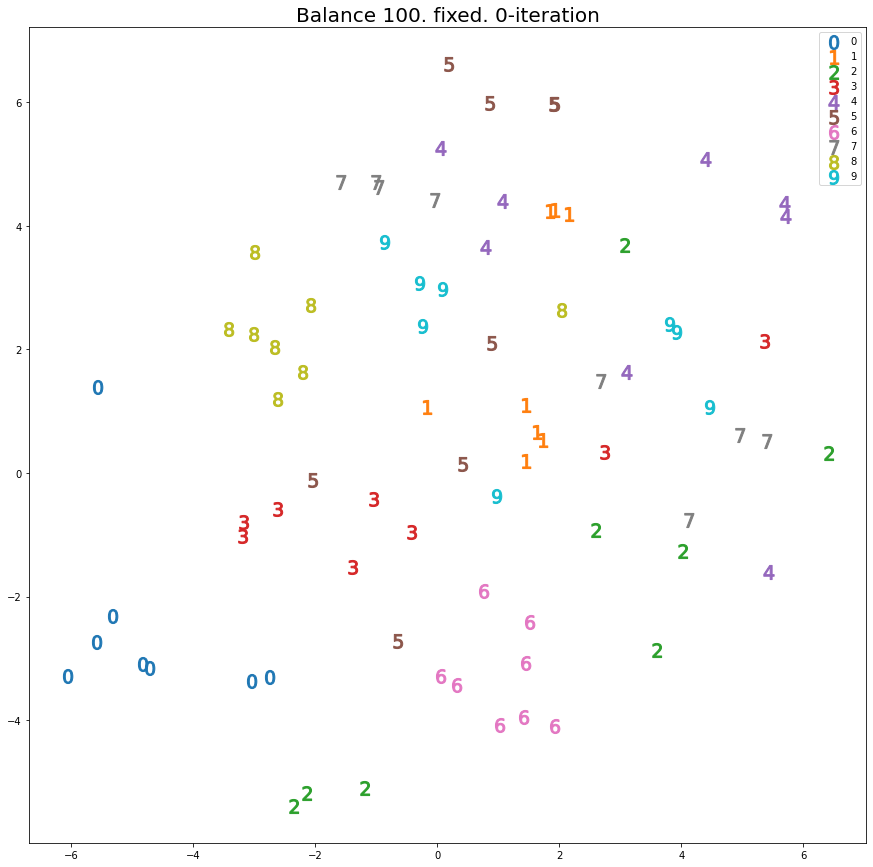

x_labeled.shape
 (80, 28, 28)
y_labeled.shape
 (80, 10)
313/313 [==============================] - 0s 1ms/step - loss: 1.0746 - accuracy: 0.6907
x_val.shape
 (20, 28, 28)
y_val.shape
 (20, 10)
predictions.shape
 (30000, 10)
len(prob_row_pair)
 30000
len(prob_row_pair_sorted)
 30000
len(expected_reference_rows)
 30000
sorted_predictions.shape
 (30000, 10)
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([0 4 2 2 4], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


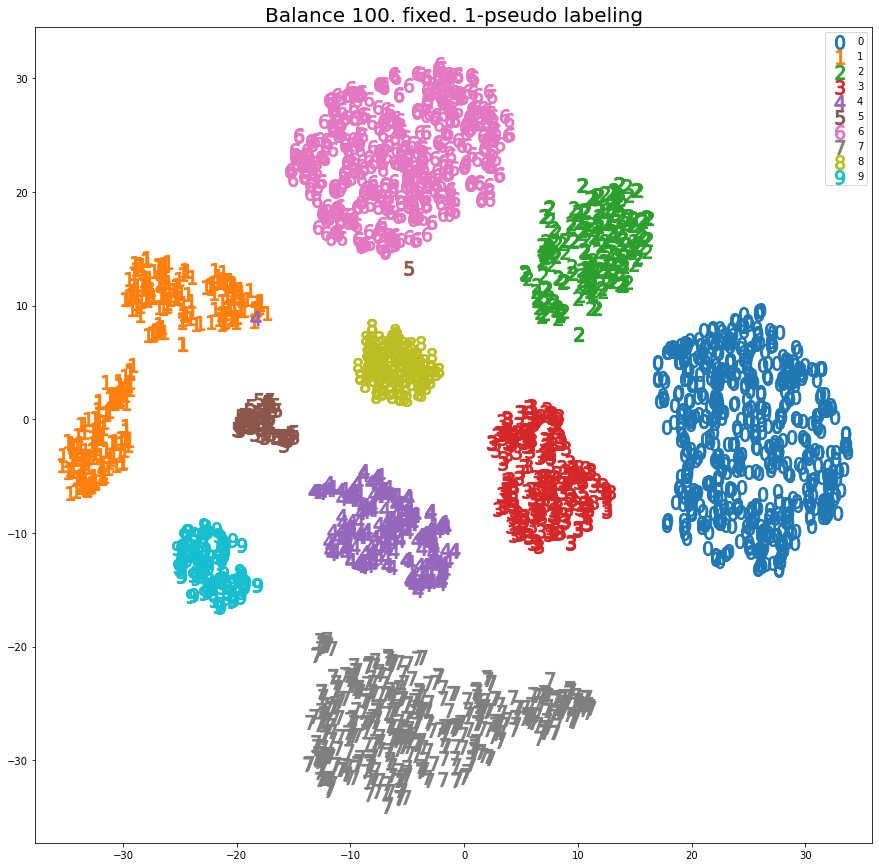

x_unlabeled.shape
 (27000, 28, 28)
len(x_unlabeled) : 27000
---------------------------------------------------------
ITERATION : 1
Epoch 1/200
97/97 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9968 - val_loss: 0.7417 - val_accuracy: 0.8000
Epoch 2/200
97/97 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9981 - val_loss: 0.7050 - val_accuracy: 0.7500
Epoch 3/200
97/97 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9948 - val_loss: 1.2764 - val_accuracy: 0.7500
Epoch 4/200
97/97 [==============================] - 0s 2ms/step - loss: 0.0914 - accuracy: 0.9958 - val_loss: 0.7144 - val_accuracy: 0.9000
Epoch 5/200
97/97 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9971 - val_loss: 0.8514 - val_accuracy: 0.7500
Epoch 6/200
97/97 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9977 - val_loss: 0.6426 - val_accuracy: 0.6500
Epoch 7/200
97/97 [===

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


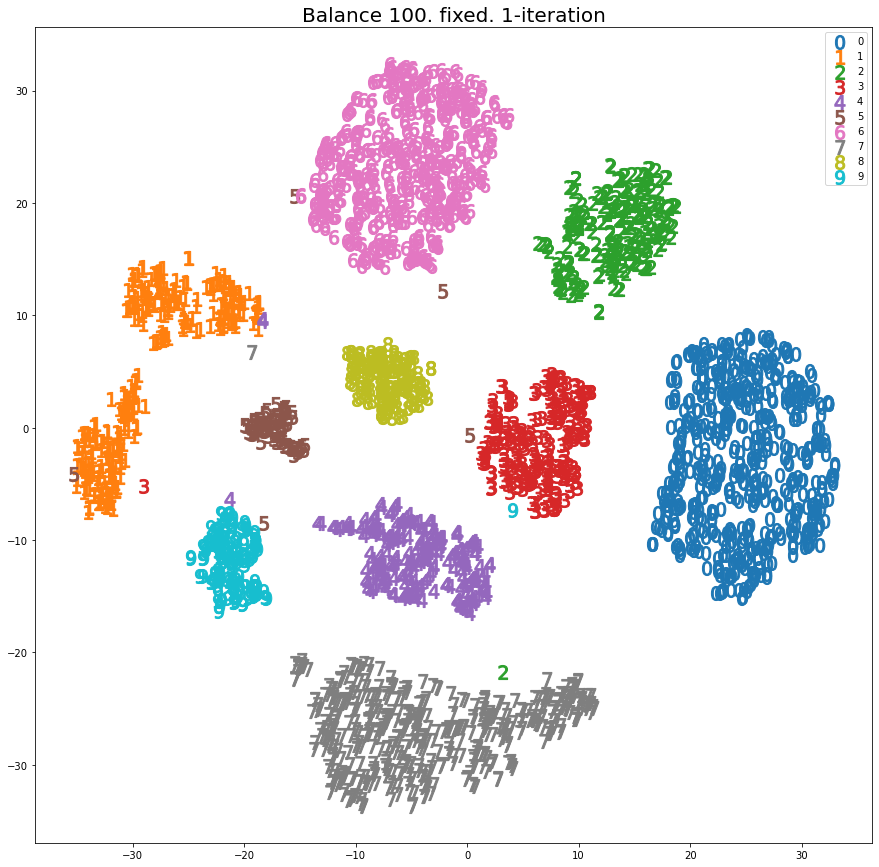

x_labeled.shape
 (3080, 28, 28)
y_labeled.shape
 (3080, 10)
313/313 [==============================] - 1s 2ms/step - loss: 1.3503 - accuracy: 0.6904
x_val.shape
 (20, 28, 28)
y_val.shape
 (20, 10)
predictions.shape
 (27000, 10)
len(prob_row_pair)
 27000
len(prob_row_pair_sorted)
 27000
len(expected_reference_rows)
 27000
sorted_predictions.shape
 (27000, 10)
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([7 7 2 2 7], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


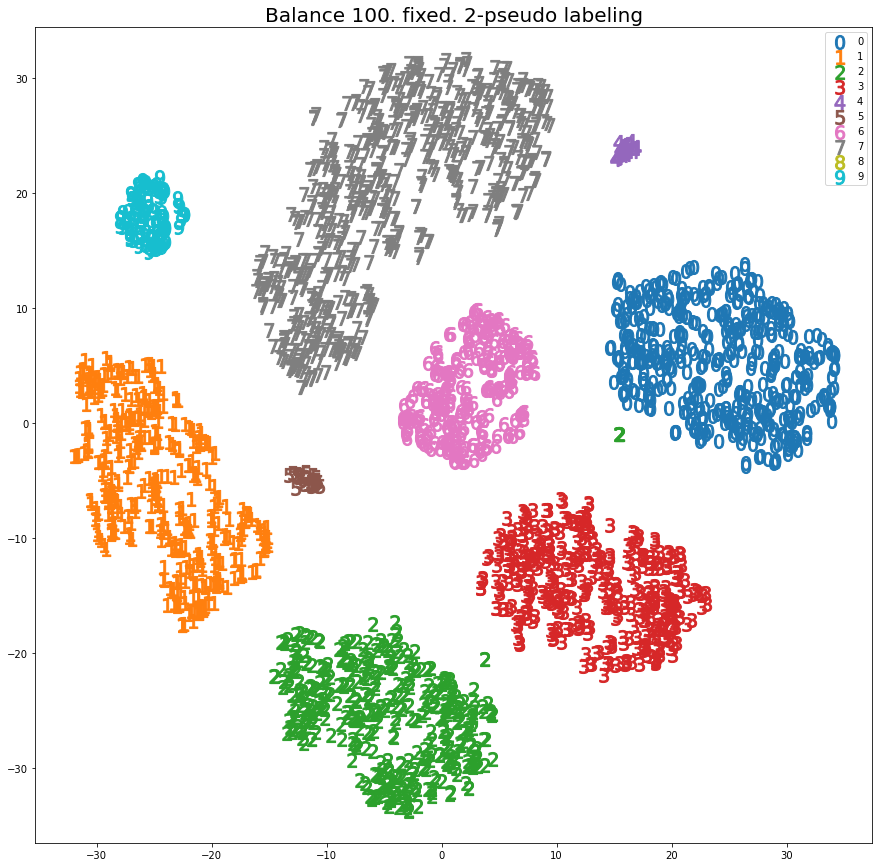

x_unlabeled.shape
 (24000, 28, 28)
len(x_unlabeled) : 24000
---------------------------------------------------------
ITERATION : 2
Epoch 1/200
190/190 [==============================] - 0s 3ms/step - loss: 0.1092 - accuracy: 0.9929 - val_loss: 1.5312 - val_accuracy: 0.7500
Epoch 2/200
190/190 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9942 - val_loss: 1.3933 - val_accuracy: 0.6500
Epoch 3/200
190/190 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9972 - val_loss: 1.1041 - val_accuracy: 0.7000
Epoch 4/200
190/190 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9956 - val_loss: 0.9028 - val_accuracy: 0.7000
Epoch 5/200
190/190 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9952 - val_loss: 0.8980 - val_accuracy: 0.8000
Epoch 6/200
190/190 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9959 - val_loss: 0.8820 - val_accuracy: 0.7500
Epoch 7/20

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


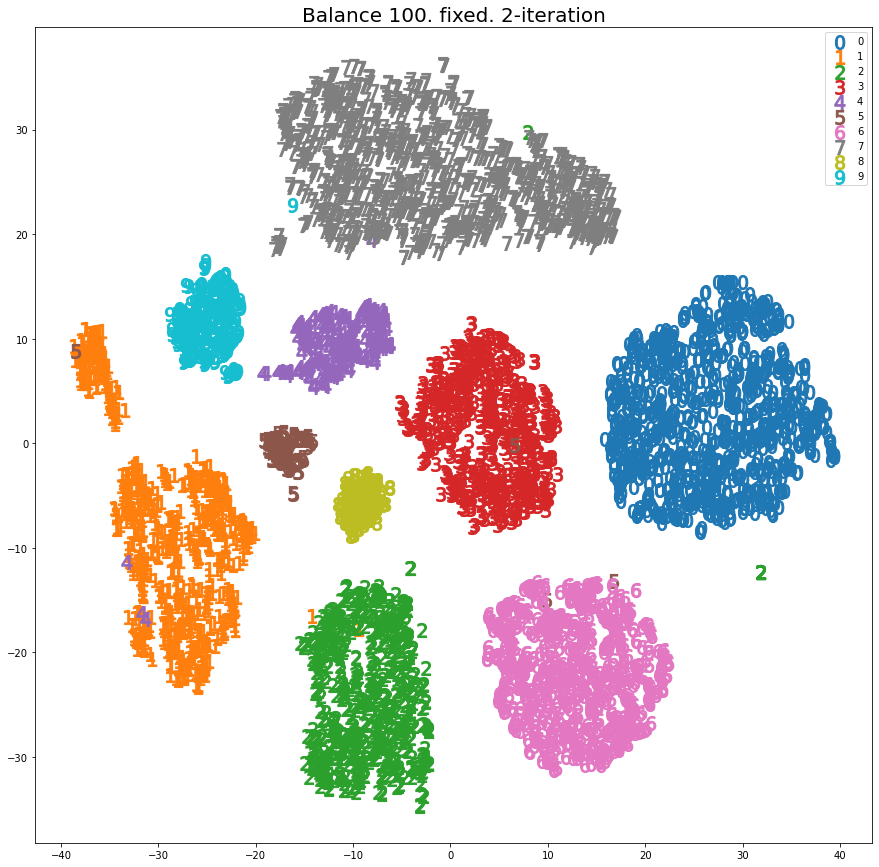

x_labeled.shape
 (6080, 28, 28)
y_labeled.shape
 (6080, 10)
313/313 [==============================] - 1s 2ms/step - loss: 1.7529 - accuracy: 0.6611
x_val.shape
 (20, 28, 28)
y_val.shape
 (20, 10)
predictions.shape
 (24000, 10)
len(prob_row_pair)
 24000
len(prob_row_pair_sorted)
 24000
len(expected_reference_rows)
 24000
sorted_predictions.shape
 (24000, 10)
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([6 2 3 3 6], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


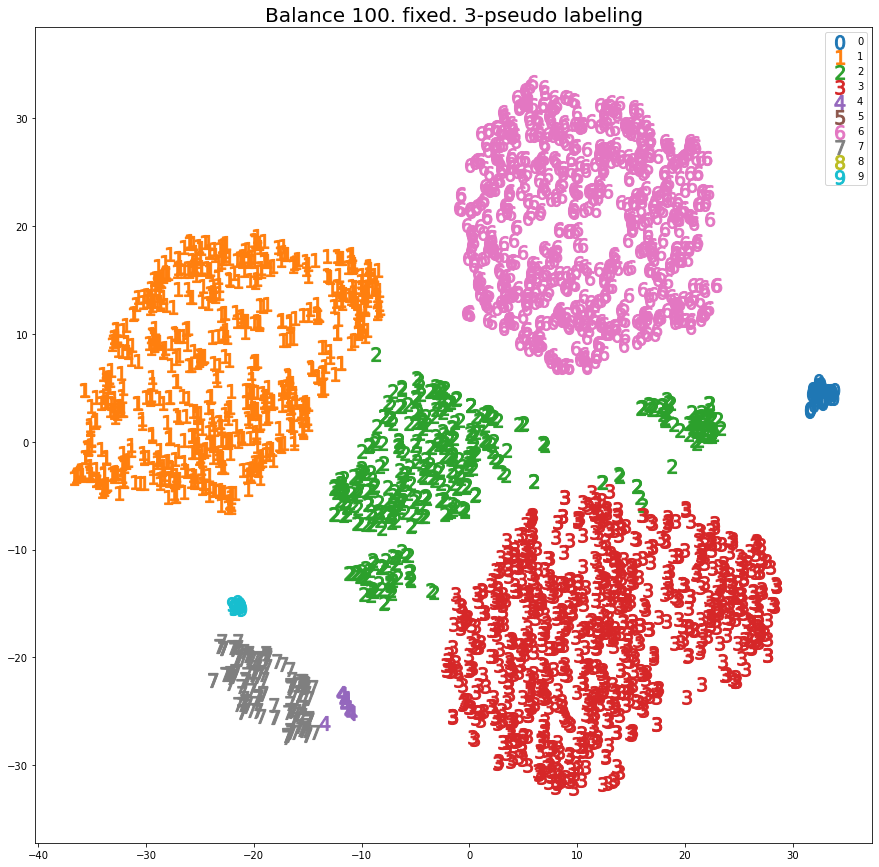

x_unlabeled.shape
 (21000, 28, 28)
len(x_unlabeled) : 21000
---------------------------------------------------------
ITERATION : 3
Epoch 1/200
284/284 [==============================] - 1s 3ms/step - loss: 0.1026 - accuracy: 0.9915 - val_loss: 0.9514 - val_accuracy: 0.7500
Epoch 2/200
284/284 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9952 - val_loss: 0.8435 - val_accuracy: 0.8000
Epoch 3/200
284/284 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9948 - val_loss: 1.2131 - val_accuracy: 0.6500
Epoch 4/200
284/284 [==============================] - 1s 2ms/step - loss: 0.0527 - accuracy: 0.9965 - val_loss: 0.8454 - val_accuracy: 0.7000
Epoch 5/200
284/284 [==============================] - 1s 2ms/step - loss: 0.0659 - accuracy: 0.9954 - val_loss: 0.7477 - val_accuracy: 0.8000
Epoch 6/200
284/284 [==============================] - 1s 2ms/step - loss: 0.0474 - accuracy: 0.9974 - val_loss: 1.3509 - val_accuracy: 0.6500
Epoch 7/20

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


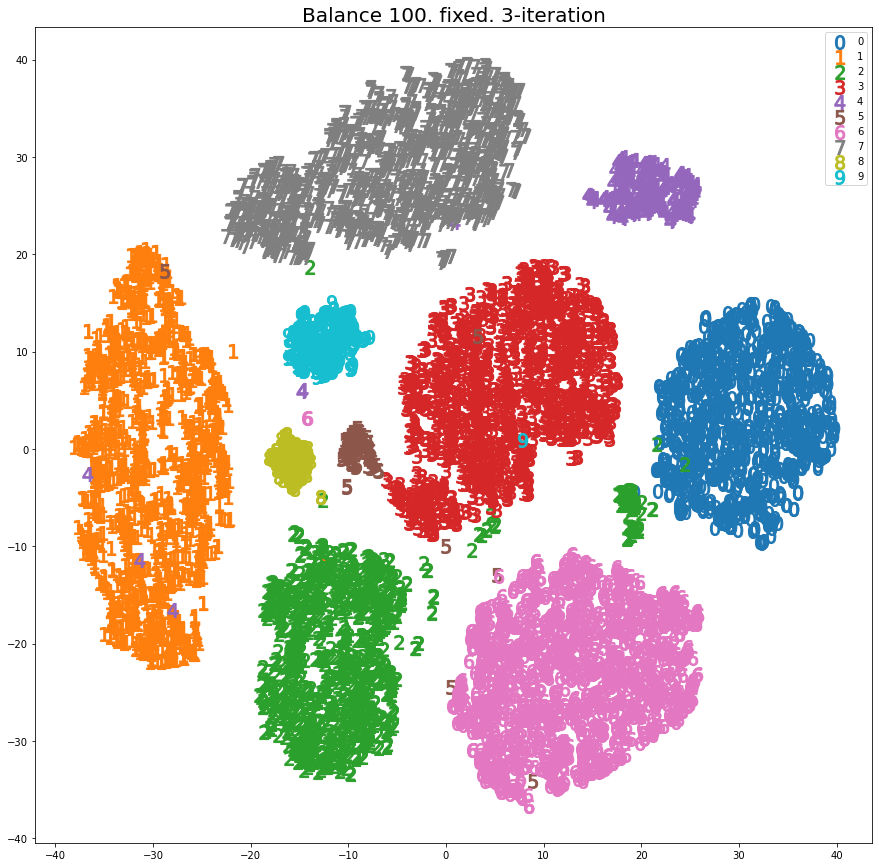

x_labeled.shape
 (9080, 28, 28)
y_labeled.shape
 (9080, 10)
313/313 [==============================] - 1s 2ms/step - loss: 1.4631 - accuracy: 0.6793
x_val.shape
 (20, 28, 28)
y_val.shape
 (20, 10)
predictions.shape
 (21000, 10)
len(prob_row_pair)
 21000
len(prob_row_pair_sorted)
 21000
len(expected_reference_rows)
 21000
sorted_predictions.shape
 (21000, 10)
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([1 1 1 1 1], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


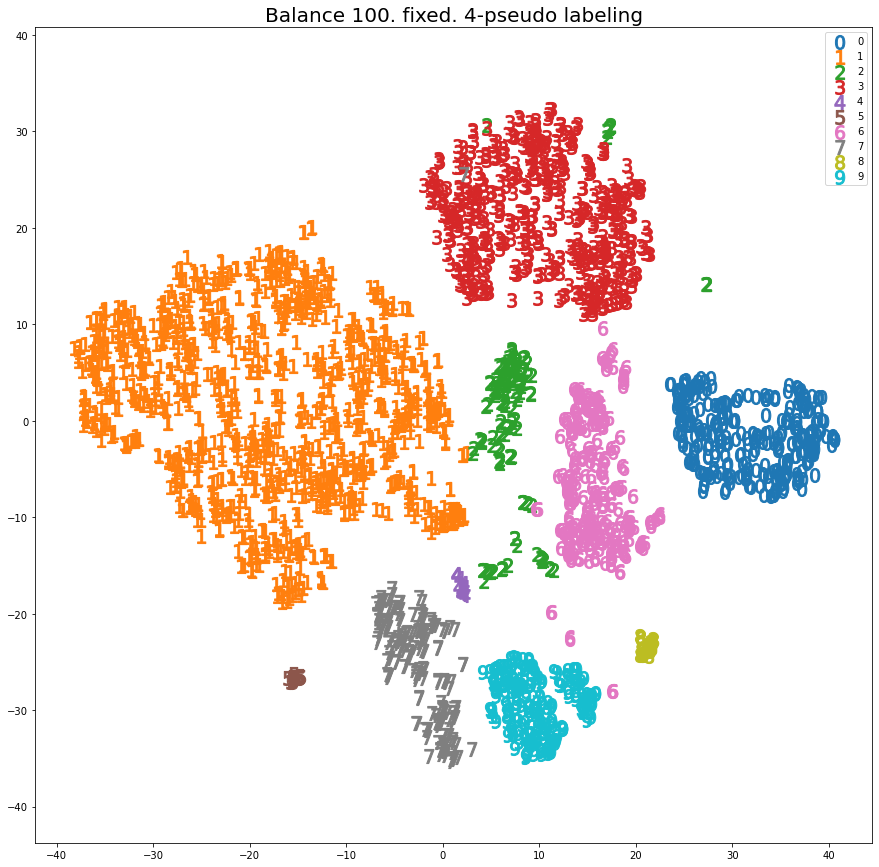

x_unlabeled.shape
 (18000, 28, 28)
len(x_unlabeled) : 18000
---------------------------------------------------------
ITERATION : 4
Epoch 1/200
378/378 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9932 - val_loss: 1.0456 - val_accuracy: 0.7500
Epoch 2/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9931 - val_loss: 1.0581 - val_accuracy: 0.8500
Epoch 3/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0508 - accuracy: 0.9972 - val_loss: 0.9152 - val_accuracy: 0.7500
Epoch 4/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9929 - val_loss: 0.8031 - val_accuracy: 0.8000
Epoch 5/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0414 - accuracy: 0.9979 - val_loss: 0.9265 - val_accuracy: 0.8500
Epoch 6/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.9955 - val_loss: 1.2553 - val_accuracy: 0.7500
Epoch 7/20

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


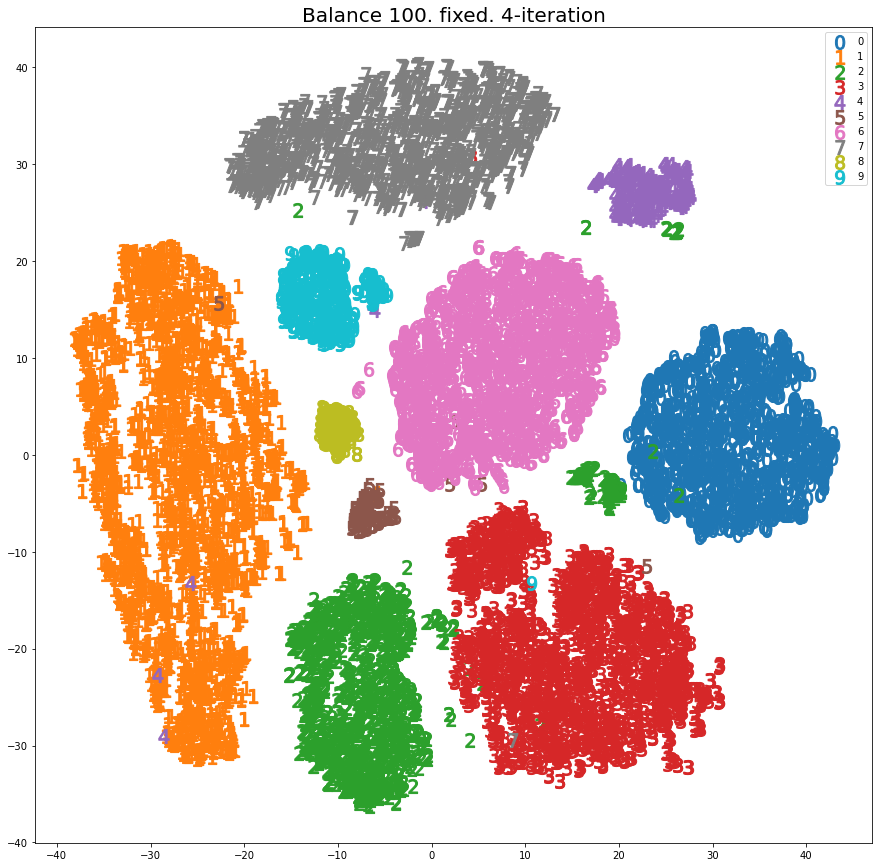

x_labeled.shape
 (12080, 28, 28)
y_labeled.shape
 (12080, 10)
313/313 [==============================] - 1s 2ms/step - loss: 1.7350 - accuracy: 0.6615
x_val.shape
 (20, 28, 28)
y_val.shape
 (20, 10)
predictions.shape
 (18000, 10)
len(prob_row_pair)
 18000
len(prob_row_pair_sorted)
 18000
len(expected_reference_rows)
 18000
sorted_predictions.shape
 (18000, 10)
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([2 2 2 7 2], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


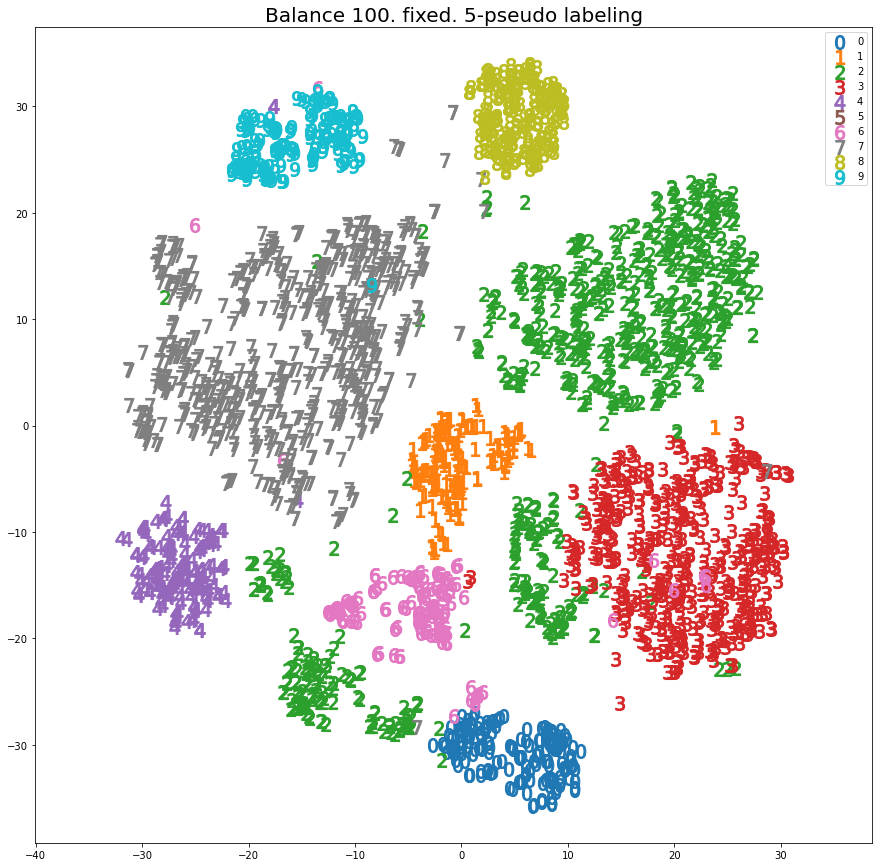

x_unlabeled.shape
 (15000, 28, 28)
len(x_unlabeled) : 15000
---------------------------------------------------------
ITERATION : 5
Epoch 1/200
472/472 [==============================] - 1s 3ms/step - loss: 0.0729 - accuracy: 0.9938 - val_loss: 1.3396 - val_accuracy: 0.6500
Epoch 2/200
472/472 [==============================] - 1s 2ms/step - loss: 0.0607 - accuracy: 0.9957 - val_loss: 1.1483 - val_accuracy: 0.8000
Epoch 3/200
472/472 [==============================] - 1s 2ms/step - loss: 0.0618 - accuracy: 0.9944 - val_loss: 1.4136 - val_accuracy: 0.7000
Epoch 4/200
472/472 [==============================] - 1s 2ms/step - loss: 0.0594 - accuracy: 0.9958 - val_loss: 1.1709 - val_accuracy: 0.7500
Epoch 5/200
472/472 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9937 - val_loss: 0.9250 - val_accuracy: 0.8000
Epoch 6/200
472/472 [==============================] - 1s 2ms/step - loss: 0.0551 - accuracy: 0.9956 - val_loss: 1.2307 - val_accuracy: 0.6500
Epoch 7/20

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


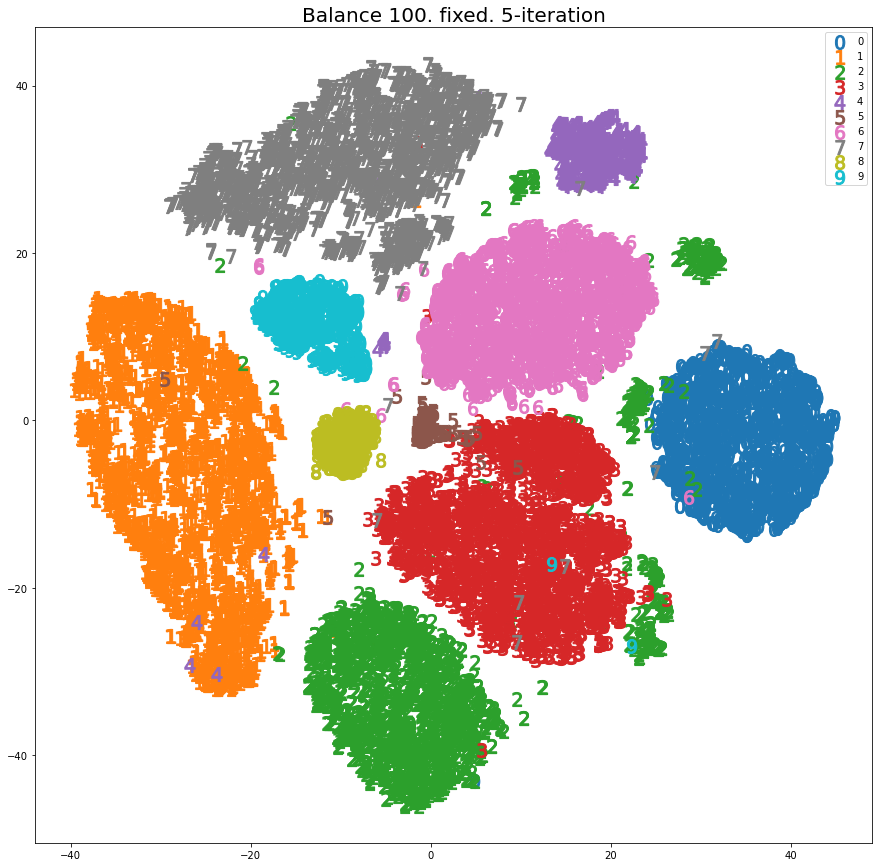

x_labeled.shape
 (15080, 28, 28)
y_labeled.shape
 (15080, 10)
313/313 [==============================] - 1s 2ms/step - loss: 1.8715 - accuracy: 0.6668
x_val.shape
 (20, 28, 28)
y_val.shape
 (20, 10)
predictions.shape
 (15000, 10)
len(prob_row_pair)
 15000
len(prob_row_pair_sorted)
 15000
len(expected_reference_rows)
 15000
sorted_predictions.shape
 (15000, 10)
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([2 7 2 7 2], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


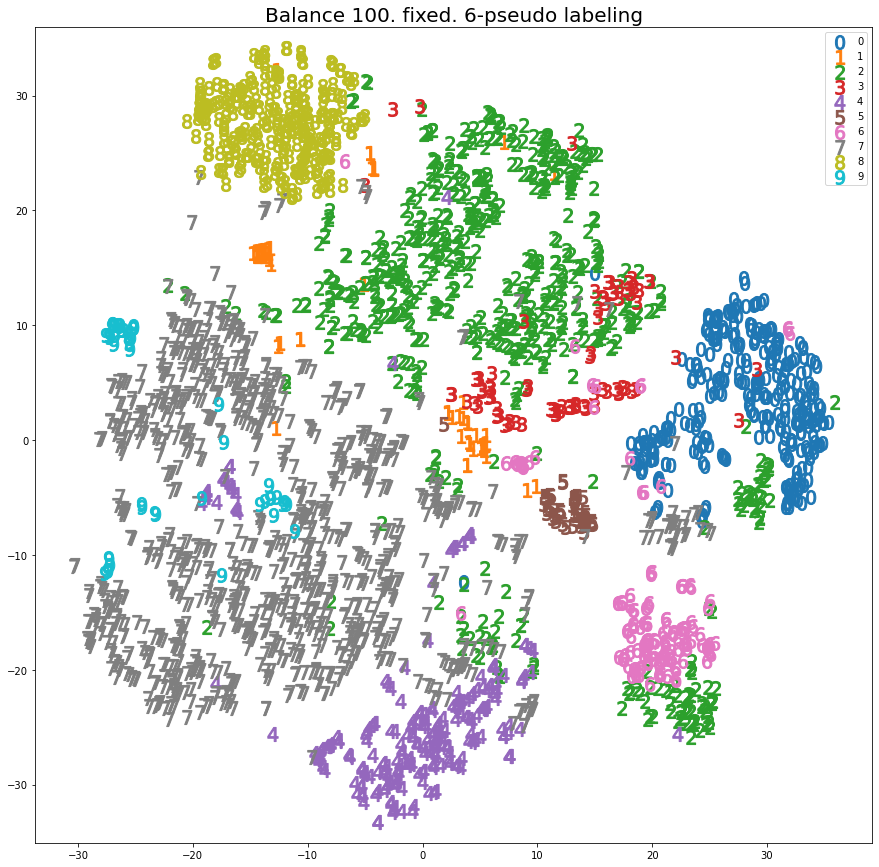

x_unlabeled.shape
 (12000, 28, 28)
len(x_unlabeled) : 12000
---------------------------------------------------------
ITERATION : 6
Epoch 1/200
565/565 [==============================] - 2s 3ms/step - loss: 0.0780 - accuracy: 0.9920 - val_loss: 1.0811 - val_accuracy: 0.7000
Epoch 2/200
565/565 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9924 - val_loss: 1.3465 - val_accuracy: 0.7500
Epoch 3/200
565/565 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9934 - val_loss: 1.5917 - val_accuracy: 0.7500
Epoch 4/200
565/565 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9930 - val_loss: 1.4361 - val_accuracy: 0.7000
Epoch 5/200
565/565 [==============================] - 1s 2ms/step - loss: 0.0584 - accuracy: 0.9958 - val_loss: 1.1980 - val_accuracy: 0.7000
Epoch 6/200
565/565 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9921 - val_loss: 0.7853 - val_accuracy: 0.8000
Epoch 7/20

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


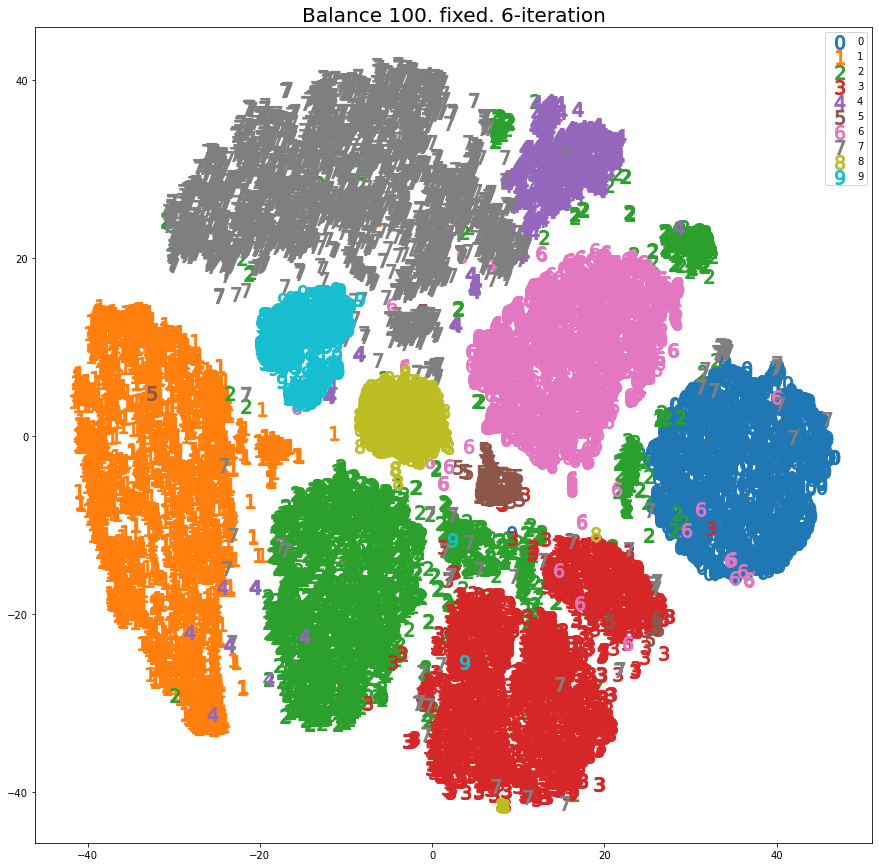

x_labeled.shape
 (18080, 28, 28)
y_labeled.shape
 (18080, 10)
313/313 [==============================] - 1s 2ms/step - loss: 2.2025 - accuracy: 0.6579
x_val.shape
 (20, 28, 28)
y_val.shape
 (20, 10)
predictions.shape
 (12000, 10)
len(prob_row_pair)
 12000
len(prob_row_pair_sorted)
 12000
len(expected_reference_rows)
 12000
sorted_predictions.shape
 (12000, 10)
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([2 2 2 2 2], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


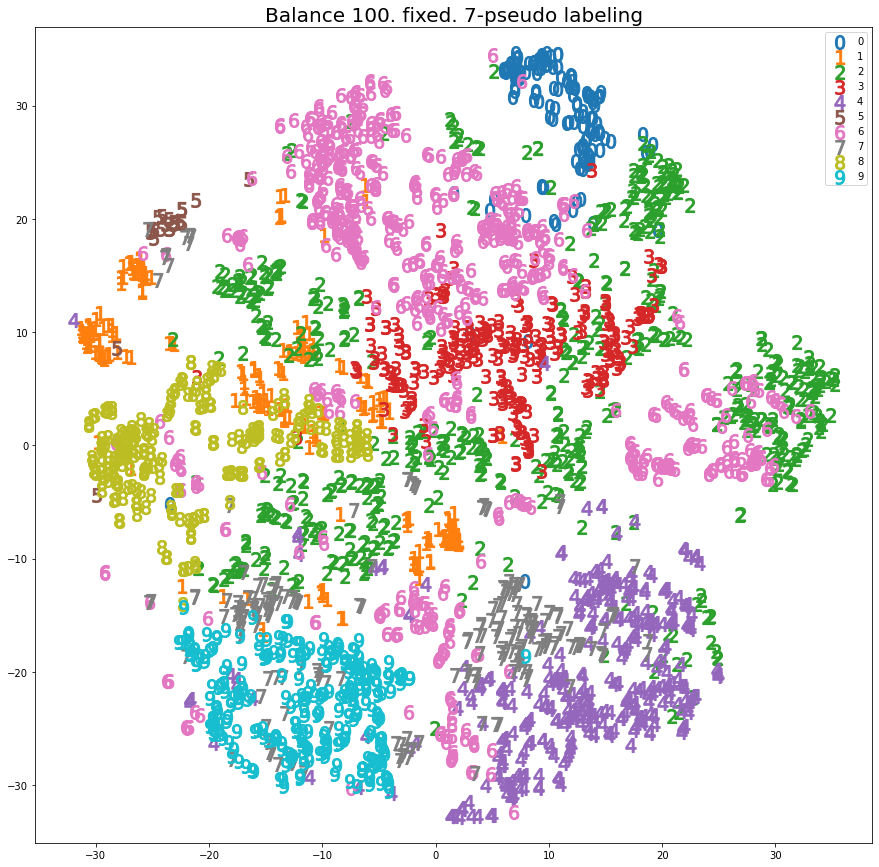

x_unlabeled.shape
 (9000, 28, 28)
len(x_unlabeled) : 9000
---------------------------------------------------------
ITERATION : 7
Epoch 1/200
659/659 [==============================] - 2s 3ms/step - loss: 0.1053 - accuracy: 0.9855 - val_loss: 1.1241 - val_accuracy: 0.7500
Epoch 2/200
659/659 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9905 - val_loss: 1.4986 - val_accuracy: 0.6500
Epoch 3/200
659/659 [==============================] - 1s 2ms/step - loss: 0.0945 - accuracy: 0.9884 - val_loss: 1.3690 - val_accuracy: 0.8000
Epoch 4/200
659/659 [==============================] - 1s 2ms/step - loss: 0.0819 - accuracy: 0.9904 - val_loss: 1.0926 - val_accuracy: 0.8500
Epoch 5/200
659/659 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9906 - val_loss: 1.3578 - val_accuracy: 0.7500
Epoch 6/200
659/659 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9904 - val_loss: 1.4256 - val_accuracy: 0.7000
Epoch 7/200


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


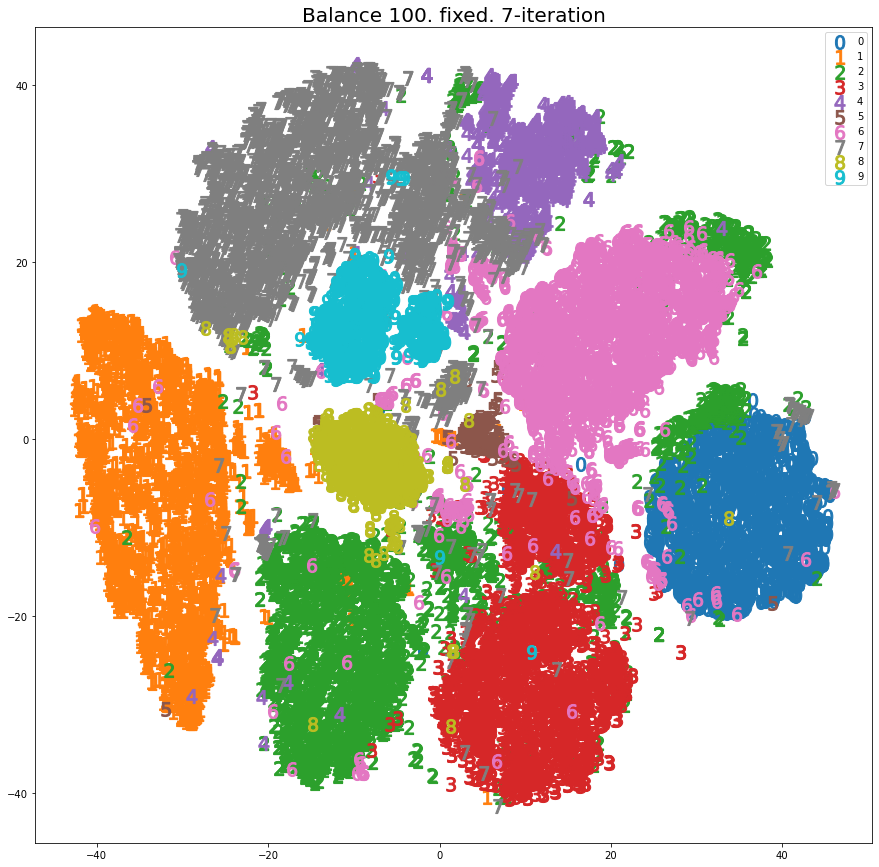

x_labeled.shape
 (21080, 28, 28)
y_labeled.shape
 (21080, 10)
313/313 [==============================] - 1s 2ms/step - loss: 2.6915 - accuracy: 0.6716
x_val.shape
 (20, 28, 28)
y_val.shape
 (20, 10)
predictions.shape
 (9000, 10)
len(prob_row_pair)
 9000
len(prob_row_pair_sorted)
 9000
len(expected_reference_rows)
 9000
sorted_predictions.shape
 (9000, 10)
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([4 2 4 3 4], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


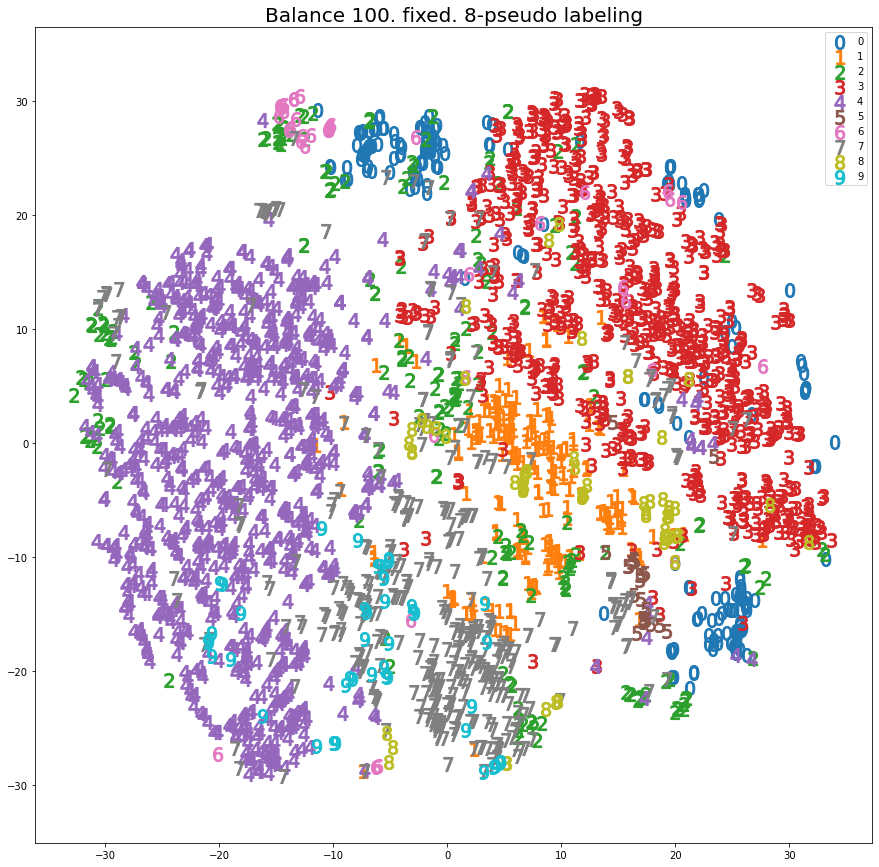

x_unlabeled.shape
 (6000, 28, 28)
len(x_unlabeled) : 6000
---------------------------------------------------------
ITERATION : 8
Epoch 1/200
753/753 [==============================] - 2s 2ms/step - loss: 0.1241 - accuracy: 0.9790 - val_loss: 1.6977 - val_accuracy: 0.6500
Epoch 2/200
753/753 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9820 - val_loss: 1.5899 - val_accuracy: 0.6500
Epoch 3/200
753/753 [==============================] - 1s 2ms/step - loss: 0.1038 - accuracy: 0.9853 - val_loss: 1.1702 - val_accuracy: 0.8000
Epoch 4/200
753/753 [==============================] - 1s 2ms/step - loss: 0.1122 - accuracy: 0.9819 - val_loss: 1.5337 - val_accuracy: 0.6500
Epoch 5/200
753/753 [==============================] - 1s 2ms/step - loss: 0.1027 - accuracy: 0.9848 - val_loss: 1.4680 - val_accuracy: 0.7500
Epoch 6/200
753/753 [==============================] - 1s 2ms/step - loss: 0.1057 - accuracy: 0.9845 - val_loss: 1.3958 - val_accuracy: 0.7000
Epoch 7/200


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


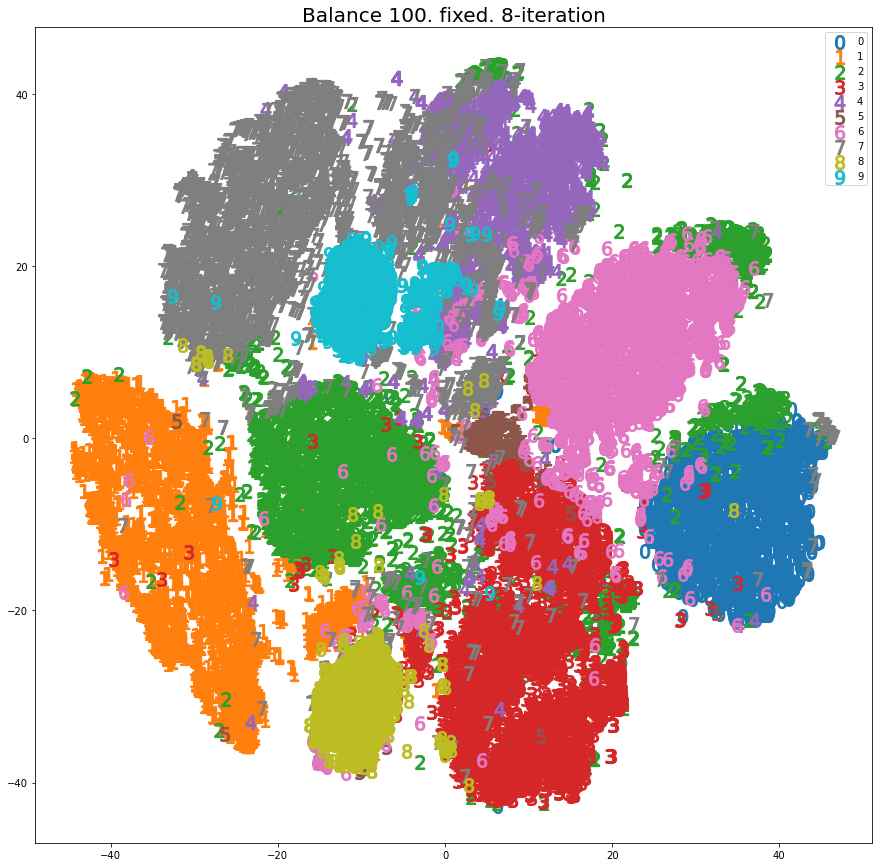

x_labeled.shape
 (24080, 28, 28)
y_labeled.shape
 (24080, 10)
313/313 [==============================] - 1s 2ms/step - loss: 3.0278 - accuracy: 0.6650
x_val.shape
 (20, 28, 28)
y_val.shape
 (20, 10)
predictions.shape
 (6000, 10)
len(prob_row_pair)
 6000
len(prob_row_pair_sorted)
 6000
len(expected_reference_rows)
 6000
sorted_predictions.shape
 (6000, 10)
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([4 4 4 4 4], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


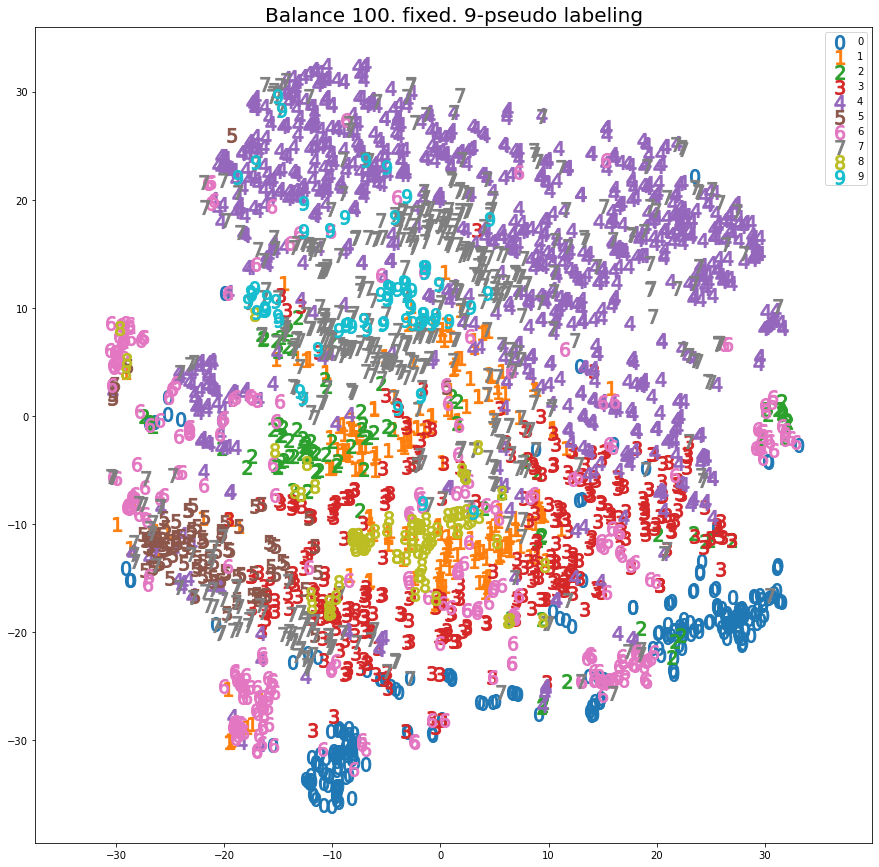

x_unlabeled.shape
 (3000, 28, 28)
len(x_unlabeled) : 3000
---------------------------------------------------------
ITERATION : 9
Epoch 1/200
847/847 [==============================] - 2s 2ms/step - loss: 0.1754 - accuracy: 0.9633 - val_loss: 1.6288 - val_accuracy: 0.6500
Epoch 2/200
847/847 [==============================] - 2s 2ms/step - loss: 0.1559 - accuracy: 0.9702 - val_loss: 1.9106 - val_accuracy: 0.7000
Epoch 3/200
847/847 [==============================] - 2s 2ms/step - loss: 0.1570 - accuracy: 0.9684 - val_loss: 1.5794 - val_accuracy: 0.7500
Epoch 4/200
847/847 [==============================] - 2s 2ms/step - loss: 0.1481 - accuracy: 0.9723 - val_loss: 1.7315 - val_accuracy: 0.7500
Epoch 5/200
847/847 [==============================] - 1s 2ms/step - loss: 0.1498 - accuracy: 0.9703 - val_loss: 2.0365 - val_accuracy: 0.6500
Epoch 6/200
847/847 [==============================] - 1s 2ms/step - loss: 0.1486 - accuracy: 0.9701 - val_loss: 1.2883 - val_accuracy: 0.7500
Epoch 7/200


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


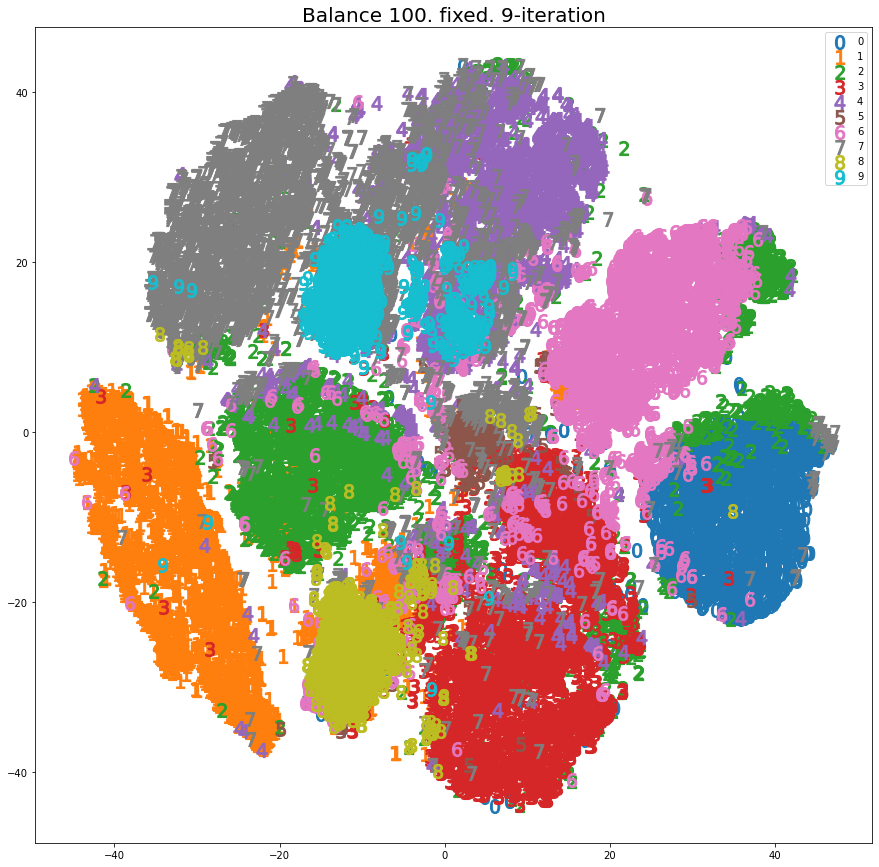

x_labeled.shape
 (27080, 28, 28)
y_labeled.shape
 (27080, 10)
313/313 [==============================] - 1s 2ms/step - loss: 3.1469 - accuracy: 0.6674
x_val.shape
 (20, 28, 28)
y_val.shape
 (20, 10)
predictions.shape
 (3000, 10)
len(prob_row_pair)
 3000
len(prob_row_pair_sorted)
 3000
len(expected_reference_rows)
 3000
sorted_predictions.shape
 (3000, 10)
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([1 6 7 1 1], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


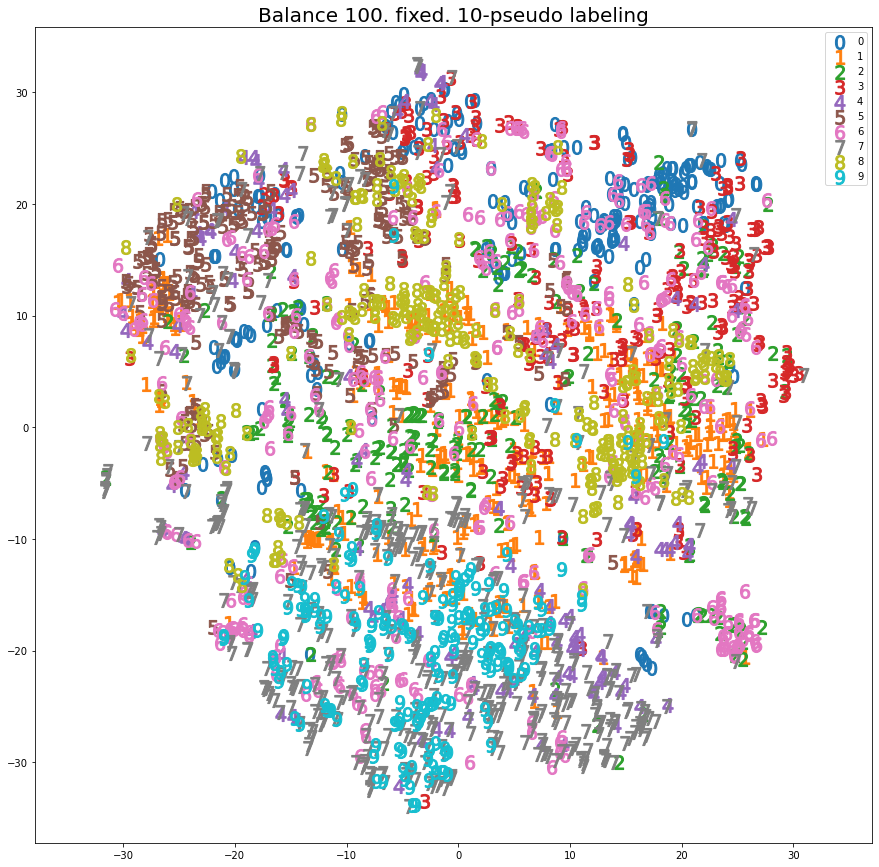

x_unlabeled.shape
 (0, 28, 28)
len(x_unlabeled) : 0
---------------------------------------------------------
ITERATION : 10
Epoch 1/200
940/940 [==============================] - 2s 2ms/step - loss: 0.2372 - accuracy: 0.9383 - val_loss: 1.3675 - val_accuracy: 0.7500
Epoch 2/200
940/940 [==============================] - 2s 2ms/step - loss: 0.2196 - accuracy: 0.9447 - val_loss: 1.6381 - val_accuracy: 0.7000
Epoch 3/200
940/940 [==============================] - 2s 2ms/step - loss: 0.2152 - accuracy: 0.9467 - val_loss: 1.6560 - val_accuracy: 0.7000
Epoch 4/200
940/940 [==============================] - 2s 2ms/step - loss: 0.2193 - accuracy: 0.9449 - val_loss: 1.5538 - val_accuracy: 0.7000
Epoch 5/200
940/940 [==============================] - 2s 2ms/step - loss: 0.2115 - accuracy: 0.9474 - val_loss: 1.9103 - val_accuracy: 0.7000
Epoch 6/200
940/940 [==============================] - 2s 2ms/step - loss: 0.2114 - accuracy: 0.9472 - val_loss: 2.0316 - val_accuracy: 0.7000
Epoch 6: early st

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


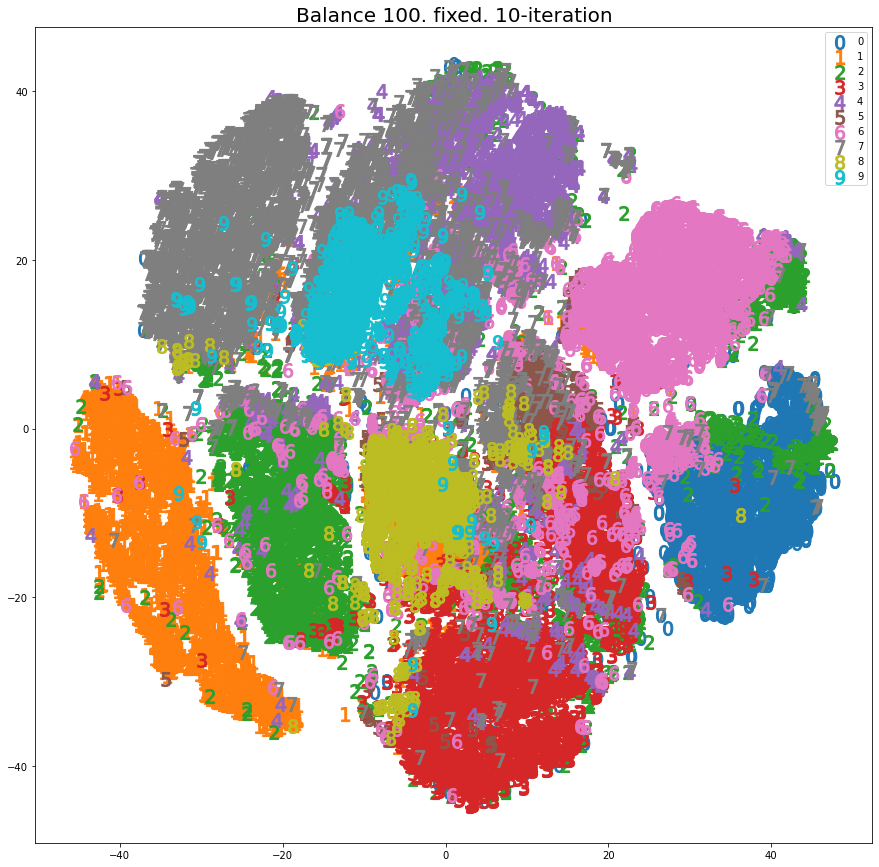

x_labeled.shape
 (30080, 28, 28)
y_labeled.shape
 (30080, 10)
313/313 [==============================] - 1s 2ms/step - loss: 3.2950 - accuracy: 0.6586
x_val.shape
 (20, 28, 28)
y_val.shape
 (20, 10)


In [13]:
# index of while-loop
iteration = 0

# train_score
train_loss = []
val_loss = []

# test_score
test_score_loss = []
test_score_acc = []

# hyper-parameter
learning_rate=1e-3
print("learning_rate\n", learning_rate)

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',  metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        verbose=1,
    )

initial_test = True

while iteration < 11:
    print("ITERATION :", iteration)
    
    # train model
    history = model.fit(x_labeled, y_labeled, callbacks=[es], shuffle=True, validation_data=(x_val, y_val), 
                        verbose=1, epochs=200)
    
    
    x_labeled_copy = x_labeled.reshape(-1, 784)
    y_labeled_copy = tf.argmax(y_labeled, axis=1)
    
    tsne_initial = TSNE(
            n_components=2,
            init="pca",
            learning_rate="auto",
            n_iter=500,
            n_iter_without_progress=150,
            n_jobs=2,
            random_state=0).fit_transform(x_labeled_copy)

    
    plt.figure(figsize=(15,15))
    
    for i in range(10):
        plt.title(f"Balance 100. fixed. {iteration}-iteration", size=20)
        plt.scatter(tsne_initial[y_labeled_copy==i, 0], tsne_initial[y_labeled_copy==i, 1], 
                label=i, marker=f"${i}$", s=200)
        
    plt.legend()
    plt.show()
    
    print("x_labeled.shape\n", x_labeled.shape)
    print("y_labeled.shape\n", y_labeled.shape)
    
    # obtain current accuracy
    loss, acc = model.evaluate(x_test, y_test)
    test_score_loss.append(loss)
    test_score_acc.append(acc)
    
    print("x_val.shape\n", x_val.shape)
    print("y_val.shape\n", y_val.shape)
    
    train_loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])
    
    iteration +=1
    
    if len(x_unlabeled) != 0:
        
        # prediction
        predictions = model.predict(x_unlabeled, verbose=0)
        #print("predictions\n", predictions[0:5])
        print("predictions.shape\n", predictions.shape)


        y_pseudo = np.argmax(predictions, axis=1)
        #print("y_pseudo\n",y_pseudo[0:5])


        y_pseudo_one_hot = np.eye(10)[y_pseudo]
        #print("y_pseudo_one_hot\n", y_pseudo_one_hot[0:5])


        high_prob = np.max(predictions, axis=1)
        #print("high_prob\n",high_prob[0:5])

        
        prob_row_pair = {}
        for idx in range(len(high_prob)):
            prob_row_pair[idx] = high_prob[idx]

        #print("prob_row_pair\n", list(prob_row_pair.items())[0:5])
        print("len(prob_row_pair)\n", len(list(prob_row_pair)))

        
        prob_row_pair_sorted = sorted(prob_row_pair.items(), key=operator.itemgetter(1), reverse=True)
        #print("prob_row_pair_sorted\n", prob_row_pair_sorted[0:5])
        print("len(prob_row_pair_sorted)\n", len(prob_row_pair_sorted))

        
        expected_reference_rows = list(dict(prob_row_pair_sorted).keys())
        #print("expected_reference_rows\n", expected_reference_rows[0:5])
        print("len(expected_reference_rows)\n", len(expected_reference_rows))


        sorted_predictions = predictions[expected_reference_rows, :]
        #print("sorted_predictions\n", sorted_predictions[0:5])
        print("sorted_predictions.shape\n", sorted_predictions.shape)


        sorted_y_pseudo = y_pseudo[expected_reference_rows]
        #print("sorted_y_pseudo\n", sorted_y_pseudo[0:5])


        sorted_y_pseudo_one_hot = np.eye(10)[sorted_y_pseudo]
        #print("sorted_y_pseudo_one_hot\n", sorted_y_pseudo_one_hot[0:5])


        # top N will be selected
        x_sub = x_unlabeled[expected_reference_rows[:3000], :, :]
        y_sub = y_pseudo_one_hot[expected_reference_rows[:3000]]
        print("x_sub.shape\n", x_sub.shape)
        print("y_sub.shape\n", y_sub.shape)
        
        x_sub_copy = x_sub.reshape(-1, 784)
        y_sub_copy = tf.argmax(y_sub, axis=1)
        
                
        print(y_sub_copy[0:5])
        
        tsne = TSNE(
                    n_components=2,
                    init="pca",
                    learning_rate="auto",
                    n_iter=500,
                    n_iter_without_progress=150,
                    n_jobs=2,
                    random_state=0).fit_transform(x_sub_copy)

        
        
        plt.figure(figsize=(15,15))
        
        try:
            plt.scatter(tsne[y_sub_copy==0, 0], tsne[y_sub_copy==0, 1], label="0", marker="$0$", s=200)
        except:
            continue
            
        try :
            plt.scatter(tsne[y_sub_copy==1, 0], tsne[y_sub_copy==1, 1], label="1", marker="$1$", s=200)
        except:
            continue
            
        try:
            plt.scatter(tsne[y_sub_copy==2, 0], tsne[y_sub_copy==2, 1], label="2", marker="$2$", s=200)
        except:
            continue
        
        try:
            plt.scatter(tsne[y_sub_copy==3, 0], tsne[y_sub_copy==3, 1], label="3", marker="$3$", s=200)
        except:
            continue
        
        try:
            plt.scatter(tsne[y_sub_copy==4, 0], tsne[y_sub_copy==4, 1], label="4", marker="$4$", s=200)
        except:
            continue
        
        try:
            plt.scatter(tsne[y_sub_copy==5, 0], tsne[y_sub_copy==5, 1], label="5", marker="$5$", s=200)
        except:
            continue
       
        try:
            plt.scatter(tsne[y_sub_copy==6, 0], tsne[y_sub_copy==6, 1], label="6", marker="$6$", s=200)
        except:
            continue
            
        try:
            plt.scatter(tsne[y_sub_copy==7, 0], tsne[y_sub_copy==7, 1], label="7", marker="$7$", s=200)
        except:
            continue
            
        try:
            plt.scatter(tsne[y_sub_copy==8, 0], tsne[y_sub_copy==8, 1], label="8", marker="$8$", s=200)
        except:
            continue
        
        try:
            plt.scatter(tsne[y_sub_copy==9, 0], tsne[y_sub_copy==9, 1], label="9", marker="$9$", s=200)
        except:
            continue
            
        plt.title(f"Balance 100. fixed. {iteration}-pseudo labeling", size=20)
        plt.gca().set_aspect('equal', 'datalim')
        plt.legend()
        #plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
        plt.show()



        x_unlabeled = np.delete(x_unlabeled, expected_reference_rows[:3000], axis=0)
        print("x_unlabeled.shape\n" , x_unlabeled.shape)
        print("len(x_unlabeled) :", len(x_unlabeled))


        x_labeled = np.concatenate([x_labeled, x_sub], axis=0)
        y_labeled = np.concatenate([y_labeled, y_sub], axis=0)


        print("---------------------------------------------------------")
        


In [14]:
for i in range(len(train_loss)):
    print(train_loss[i])
    print()

[8.347256660461426, 7.094608306884766, 6.1895952224731445, 5.46600866317749, 4.852568626403809, 4.344618320465088, 3.902482271194458, 3.52533221244812, 3.1899666786193848, 2.894843816757202, 2.631147861480713, 2.398144245147705, 2.189150333404541, 1.9990787506103516, 1.8287723064422607, 1.6744182109832764, 1.535679578781128, 1.4110839366912842, 1.2985212802886963, 1.1972160339355469, 1.1055715084075928, 1.0229557752609253, 0.9483314752578735, 0.8809501528739929, 0.8197110891342163, 0.7638834118843079, 0.7134076952934265, 0.6669248342514038, 0.6245818138122559, 0.5855267643928528, 0.550230860710144, 0.517524778842926, 0.4872860908508301, 0.4594481587409973, 0.4340190291404724, 0.4101521074771881, 0.38820987939834595, 0.36793118715286255, 0.34912633895874023, 0.3318137526512146, 0.31552571058273315, 0.30079537630081177, 0.28653910756111145, 0.27374446392059326, 0.26171836256980896, 0.2505963444709778, 0.24008922278881073, 0.2303636372089386, 0.2220926582813263, 0.21373336017131805, 0.205

In [15]:
for i in range(len(val_loss)):
    print(val_loss[i])
    print()

[7.5295915603637695, 6.706000328063965, 6.017161846160889, 5.413517475128174, 4.923940181732178, 4.512964725494385, 4.13582706451416, 3.811323642730713, 3.526658296585083, 3.267028331756592, 3.030999183654785, 2.8063387870788574, 2.610109329223633, 2.4384937286376953, 2.2928314208984375, 2.1560463905334473, 2.0363805294036865, 1.9269740581512451, 1.821729302406311, 1.7280590534210205, 1.6356391906738281, 1.5594117641448975, 1.4866611957550049, 1.4154865741729736, 1.3533935546875, 1.2967597246170044, 1.2459852695465088, 1.2064884901046753, 1.1659214496612549, 1.1274532079696655, 1.086560606956482, 1.0552805662155151, 1.0304481983184814, 1.005366325378418, 0.982007622718811, 0.9616068005561829, 0.9440523386001587, 0.9224883317947388, 0.9019447565078735, 0.8734344244003296, 0.8688654899597168, 0.856825053691864, 0.8332425951957703, 0.8256132006645203, 0.8125503659248352, 0.7881348729133606, 0.7867428064346313, 0.7900550365447998, 0.771213173866272, 0.7764124274253845, 0.7522697448730469, 

# Train/Val Loss

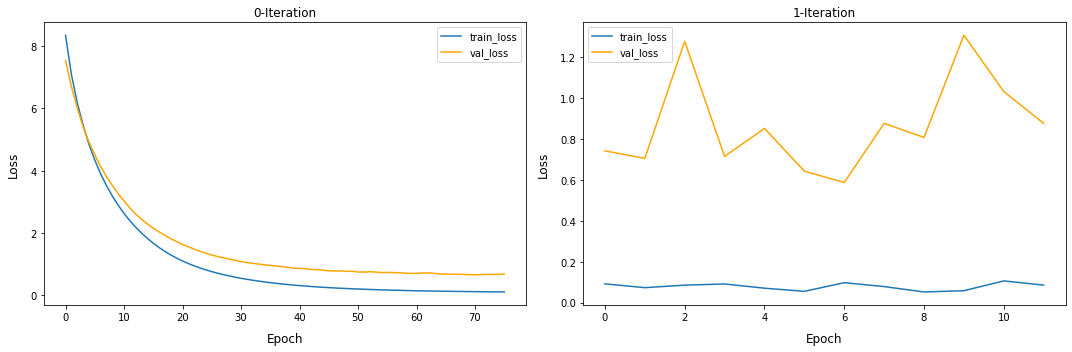

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('{}-Iteration'.format(0))
plt.plot(train_loss[0], label='train_loss')
plt.plot(val_loss[0], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()


plt.subplot(1,2,2)
plt.title('{}-Iteration'.format(1))
plt.plot(train_loss[1], label='train_loss')
plt.plot(val_loss[1], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.tight_layout()

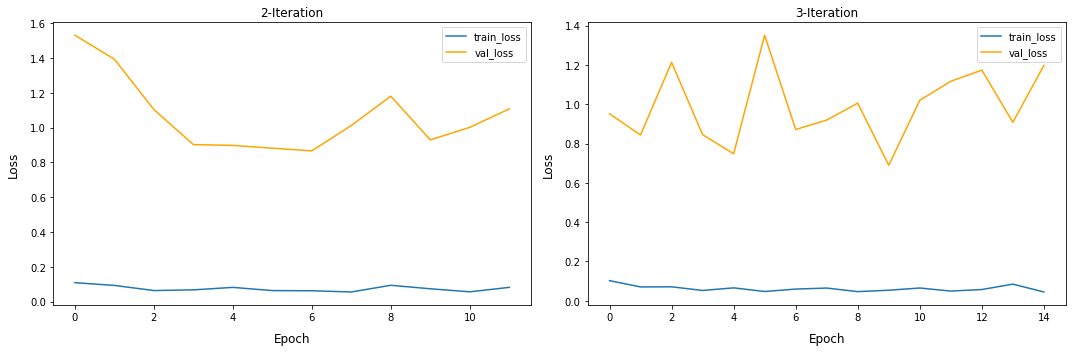

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('{}-Iteration'.format(2))
plt.plot(train_loss[2], label='train_loss')
plt.plot(val_loss[2], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.subplot(1,2,2)
plt.title('{}-Iteration'.format(3))
plt.plot(train_loss[3], label='train_loss')
plt.plot(val_loss[3], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.tight_layout()

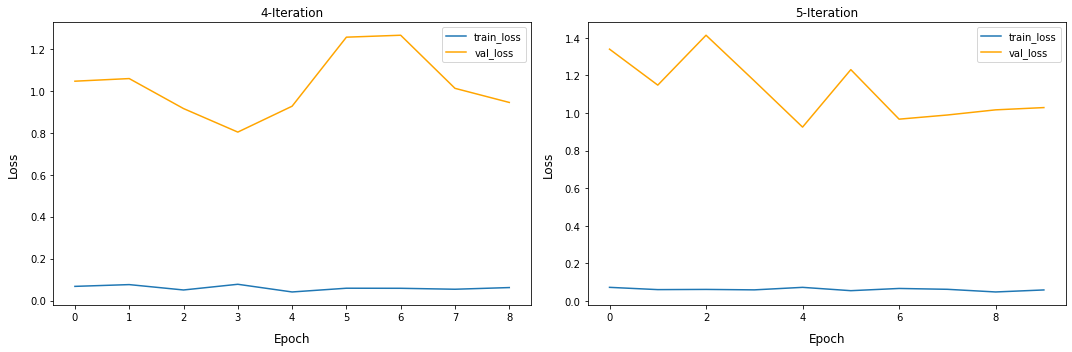

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('{}-Iteration'.format(4))
plt.plot(train_loss[4], label='train_loss')
plt.plot(val_loss[4], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.subplot(1,2,2)
plt.title('{}-Iteration'.format(5))
plt.plot(train_loss[5], label='train_loss')
plt.plot(val_loss[5], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.tight_layout()

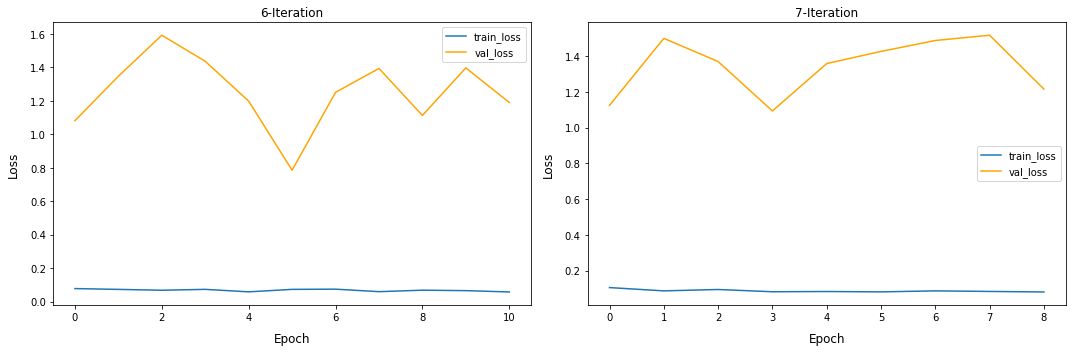

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('{}-Iteration'.format(6))
plt.plot(train_loss[6], label='train_loss')
plt.plot(val_loss[6], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.subplot(1,2,2)
plt.title('{}-Iteration'.format(7))
plt.plot(train_loss[7], label='train_loss')
plt.plot(val_loss[7], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.tight_layout()

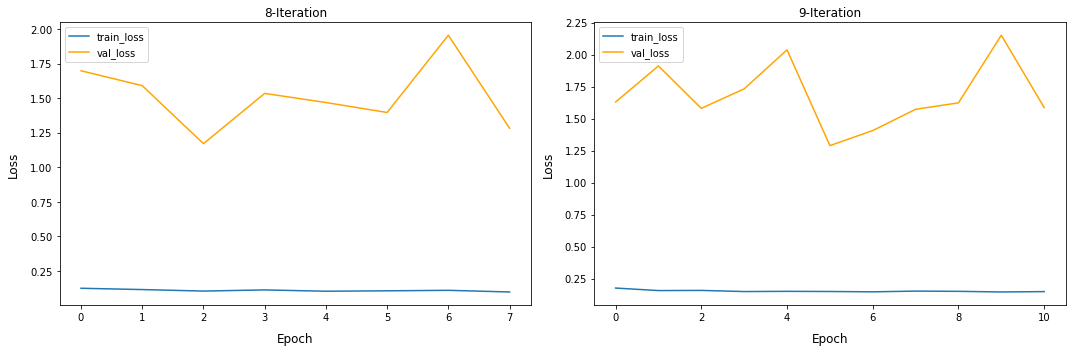

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('{}-Iteration'.format(8))
plt.plot(train_loss[8], label='train_loss')
plt.plot(val_loss[8], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.subplot(1,2,2)
plt.title('{}-Iteration'.format(9))
plt.plot(train_loss[9], label='train_loss')
plt.plot(val_loss[9], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.tight_layout()

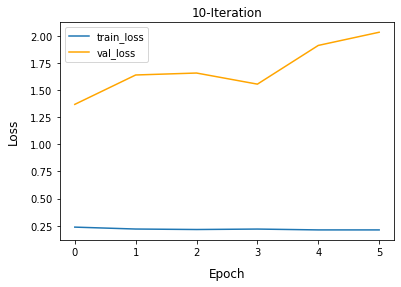

In [21]:
plt.title('{}-Iteration'.format(10))
plt.plot(train_loss[10], label='train_loss')
plt.plot(val_loss[10], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

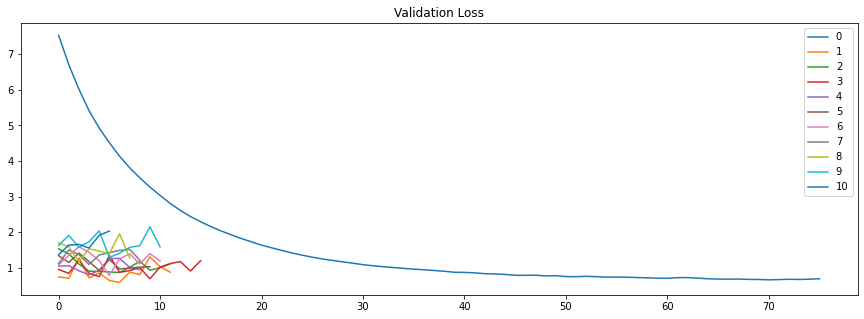

In [22]:
plt.figure(figsize=(15,5))
plt.title('Validation Loss')
plt.plot(val_loss[0], label='0')
plt.plot(val_loss[1], label='1')
plt.plot(val_loss[2], label='2')
plt.plot(val_loss[3], label='3')
plt.plot(val_loss[4], label='4')
plt.plot(val_loss[5], label='5')
plt.plot(val_loss[6], label='6')
plt.plot(val_loss[7], label='7')
plt.plot(val_loss[8], label='8')
plt.plot(val_loss[9], label='9')
plt.plot(val_loss[10], label='10')
plt.legend()

# TEST SCORE

In [23]:
print('test_score_loss\n',test_score_loss)
print('test_score_acc\n',test_score_acc)

test_score_loss
 [1.0745960474014282, 1.3502713441848755, 1.7528630495071411, 1.4631280899047852, 1.7350361347198486, 1.8714945316314697, 2.2025063037872314, 2.691528797149658, 3.0278193950653076, 3.1469101905822754, 3.295032024383545]
test_score_acc
 [0.6906999945640564, 0.6904000043869019, 0.6610999703407288, 0.6793000102043152, 0.6614999771118164, 0.6668000221252441, 0.6578999757766724, 0.6715999841690063, 0.6650000214576721, 0.6674000024795532, 0.6585999727249146]


In [24]:
len(test_score_loss)

11

In [25]:
len(test_score_acc)

11

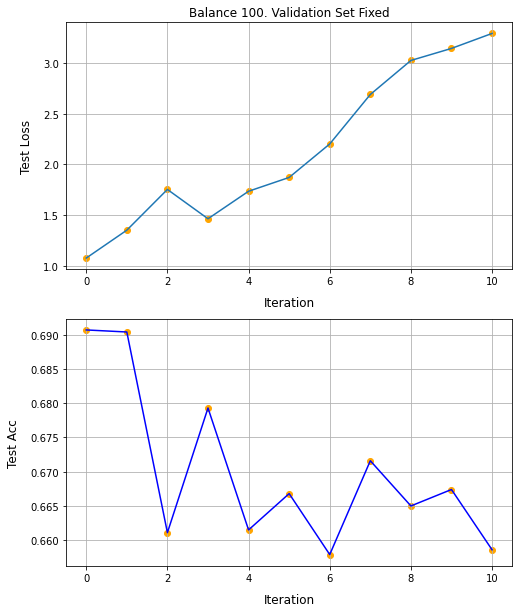

In [26]:
plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.title("Balance 100. Validation Set Fixed")
plt.scatter(range(11), test_score_loss, color='orange')
plt.plot(test_score_loss)
plt.xlabel('Iteration', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Test Loss', labelpad=10, fontdict={'size' : 12})
plt.grid(True)

plt.subplot(2,1,2)
plt.scatter(range(11), test_score_acc, color='orange')
plt.plot(test_score_acc, color='blue')
plt.xlabel('Iteration', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Test Acc', labelpad=10, fontdict={'size' : 12})
plt.grid(True)